### Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

### Loading Data:

In [2]:
df=pd.read_csv(r"C:\Users\Vishal S\Downloads\archive (14)\coffee_shop_revenue.csv")
df

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42
...,...,...,...,...,...,...,...
1995,372,6.41,11,4,466.11,913,2816.85
1996,105,3.01,11,7,12.62,235,337.97
1997,89,5.28,16,9,376.64,310,951.34
1998,403,9.41,7,12,452.49,577,4266.21


### Exploratory Data Analysis:

In [3]:
df.shape

(2000, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


In [5]:
df.isnull().sum()

Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

<Axes: >

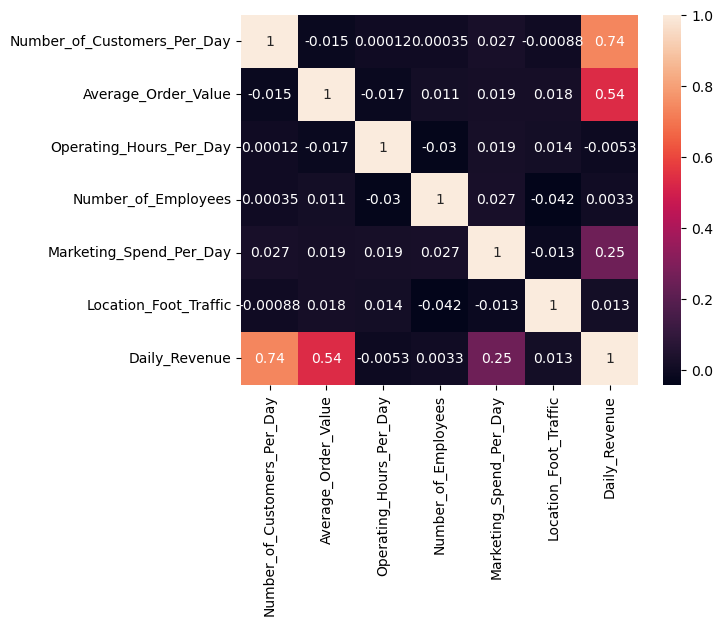

In [7]:
sns.heatmap(df.corr() , annot=True)

<Axes: xlabel='Average_Order_Value'>

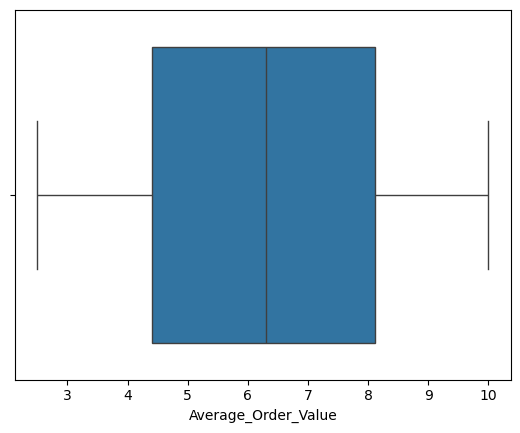

In [8]:
sns.boxplot(x=df['Average_Order_Value'])

<Axes: xlabel='Daily_Revenue', ylabel='Count'>

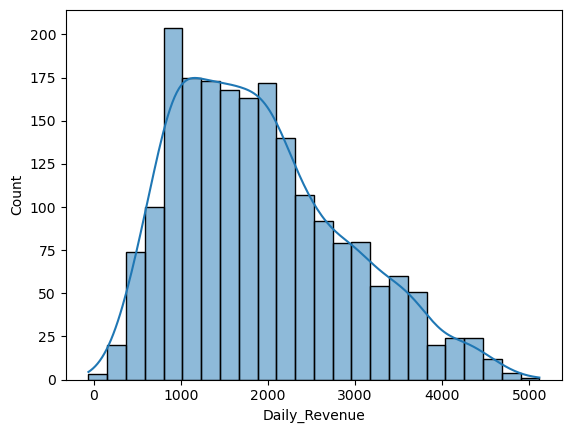

In [9]:
sns.histplot(df['Daily_Revenue'], kde=True)

In [10]:
df['Daily_Revenue'].skew()

0.6350175930112962

### Scaling the Data:

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
features=['Number_of_Customers_Per_Day','Average_Order_Value','Operating_Hours_Per_Day','Number_of_Employees','Marketing_Spend_Per_Day','Location_Foot_Traffic']
df[features]=sc.fit_transform(df[features])

In [12]:
df

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,-0.945031,0.220102,0.678642,-1.054986,-1.034681,-1.612307,1547.81
1,1.628195,-0.809647,0.096866,0.014166,-1.380462,0.769922,2084.68
2,0.955911,1.300418,-1.648463,-0.520410,-1.139995,0.372270,3118.39
3,0.353173,1.019996,1.551306,-1.054986,1.488411,0.865653,2912.20
4,-0.914121,0.541898,1.551306,-1.589562,1.133274,-1.115242,1663.42
...,...,...,...,...,...,...,...
1995,0.754998,0.068398,-0.194022,-1.054986,1.513074,1.392174,2816.85
1996,-1.308219,-1.494613,-0.194022,-0.253122,-1.700871,-1.104196,337.97
1997,-1.431857,-0.451074,1.260418,0.281454,0.878988,-0.828049,951.34
1998,0.994548,1.447525,-1.357575,1.083318,1.416547,0.155035,4266.21


### Splitting the Data:

In [13]:
X=df.drop(columns=['Daily_Revenue'])
Y=df['Daily_Revenue']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=15)

### Building Models:

In [15]:
lin=LinearRegression()
lin.fit(x_train,y_train)
y_pred=lin.predict(x_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

MSE: 107714.58112403551
R2 Score: 0.892147769688253
MAE: 260.15448938477556


In [16]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
dt = DecisionTreeRegressor(random_state=15)

# Train the model
dt.fit(x_train, y_train)

# Predict on test data
y_pred_dt = dt.predict(x_test)

# Evaluate the model
print(f"Decision Tree MSE: {mean_squared_error(y_test, y_pred_dt)}")
print(f"Decision Tree R2 Score: {r2_score(y_test, y_pred_dt)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_dt)}")

Decision Tree MSE: 99732.79911425
Decision Tree R2 Score: 0.9001397516709547
MAE: 253.858475


In [17]:
from sklearn.svm import SVR

# Initialize SVR model
svr = SVR(kernel='rbf')  # 'rbf' is the default kernel, suitable for non-linear data

# Train the model
svr.fit(x_train, y_train)

# Predict on test data
y_pred_svr = svr.predict(x_test)

# Evaluate the model
print(f"SVR MSE: {mean_squared_error(y_test, y_pred_svr)}")
print(f"SVR R2 Score: {r2_score(y_test, y_pred_svr)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_svr)}")

SVR MSE: 924240.0365870048
SVR R2 Score: 0.07457887085376158
MAE: 758.3516792759174


In [18]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=15)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"Random Forest R2 Score: {r2_score(y_test, y_pred_rf)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")

Random Forest MSE: 52922.81552515524
Random Forest R2 Score: 0.947009554052924
MAE: 187.2578977500001


### Tuning Hyperlparameter using GridSearch:

In [19]:
from sklearn.model_selection import GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 60, 80],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=15), param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

# Get best model and evaluate
best_rf = grid_search_rf.best_estimator_
y_pred_rf_best = best_rf.predict(x_test)

print(f"Best Random Forest Parameters: {grid_search_rf.best_params_}")
print(f"Best Random Forest MSE: {mean_squared_error(y_test, y_pred_rf_best)}")
print(f"Best Random Forest R2 Score: {r2_score(y_test, y_pred_rf_best)}")

Best Random Forest Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 60}
Best Random Forest MSE: 52716.51050690349
Best Random Forest R2 Score: 0.9472161227097462


### Fitting the Best Model:

In [20]:
rfm = RandomForestRegressor(n_estimators=80, max_depth=15, min_samples_leaf=1, min_samples_split=5, random_state=15)
rfm.fit(x_train, y_train)
y_pred_rf = rfm.predict(x_test)

print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"Random Forest R2 Score: {r2_score(y_test, y_pred_rf)}")

Random Forest MSE: 52450.557431077854
Random Forest R2 Score: 0.9474824156487962


### Prediction System:

In [23]:
print("Enter the following details to predict daily revenue:")
cust = float(input("Number of Customers Per Day: "))
order_val = float(input("Average Order Value: "))
hours = float(input("Operating Hours Per Day: "))
employees = float(input("Number of Employees: "))
marketing = float(input("Marketing Spend Per Day: "))
foot_traffic = float(input("Location Foot Traffic: "))

# Create input array and scale
user_input = np.array([[cust, order_val, hours, employees, marketing, foot_traffic]])
user_input_scaled = sc.transform(user_input)

# Predict revenue
predicted_revenue = rfm.predict(user_input_scaled)
print(f"\n📈 Predicted Daily Revenue: ${predicted_revenue[0]:.2f}")

Enter the following details to predict daily revenue:


Number of Customers Per Day:  34
Average Order Value:  45
Operating Hours Per Day:  56
Number of Employees:  5
Marketing Spend Per Day:  44
Location Foot Traffic:  33



📈 Predicted Daily Revenue: $813.66


### Saving Model:

In [24]:
import pickle
pickle.dump(sc,open('scalar.pkl','wb'))
pickle.dump(rfm, open('model.pkl', 'wb'))